### Task 2 - Unsupervised ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(["Id"], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
X = df.iloc[:,:-1].values

In [23]:
Y = df.iloc[:,-1]

In [24]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

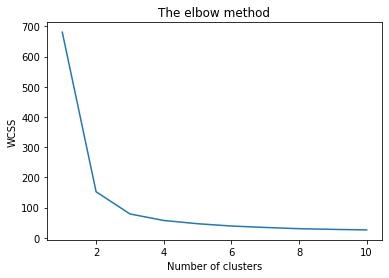

In [25]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [26]:
### Let us choose the number of clusters as 3

model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter=300, n_init=10, random_state=0)

Y_pred = model.fit_predict(X)

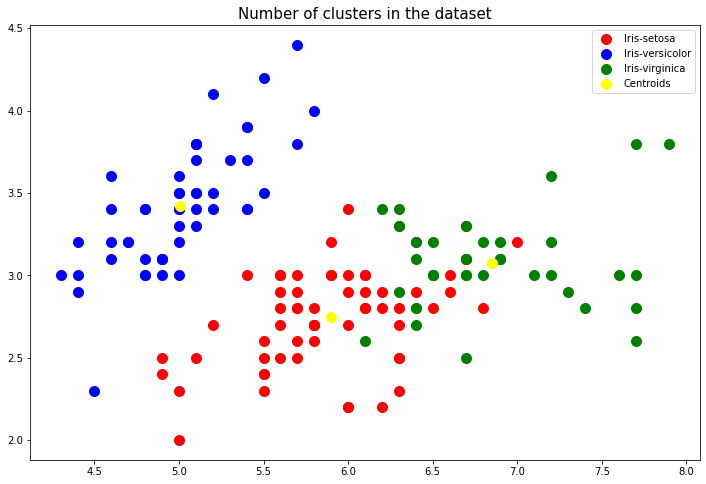

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(X[Y_pred == 0,0], X[Y_pred == 0,1],
            s=100, c='red', label = 'Iris-setosa')

plt.scatter(X[Y_pred == 1,0], X[Y_pred == 1,1],
            s=100, c='blue', label = 'Iris-versicolor')

plt.scatter(X[Y_pred == 2,0], X[Y_pred == 2,1],
            s=100, c='green', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],
            s=100, c="yellow", label="Centroids")


plt.legend()
plt.title("Number of clusters in the dataset",fontsize=15)
plt.show()

In [33]:
### Save the model

import pickle as pkl

pkl.dump(model,open("model.pkl","wb"))